In [ ]:
# Run this in Colab or terminal if using locally
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Generate mock data
def generate_mock_data(n=1000):
    data = {
        'date': [datetime.today() - timedelta(days=i) for i in range(n)],
        'location': np.random.choice(['Hyderabad', 'Bangalore', 'Chennai'], size=n),
        'groundType': np.random.choice(['Turf', 'Clay', 'Grass'], size=n),
        'hourOfDay': np.random.randint(6, 22, size=n),
        'pricePerHour': np.random.randint(500, 1500, size=n),
        'weather': np.random.choice(['Sunny', 'Cloudy', 'Rainy'], size=n),
        'isBooked': np.random.choice([0, 1], size=n, p=[0.4, 0.6])
    }
    return pd.DataFrame(data)

df = generate_mock_data()
df.head()


,date,location,groundType,hourOfDay,pricePerHour,weather,isBooked
0,2025-05-21 07:24:50.581452,Chennai,Grass,12,777,Cloudy,0
1,2025-05-20 07:24:50.581473,Hyderabad,Grass,15,729,Sunny,1
2,2025-05-19 07:24:50.581478,Bangalore,Grass,17,1136,Cloudy,1
3,2025-05-18 07:24:50.581481,Hyderabad,Grass,13,1340,Cloudy,1
4,2025-05-17 07:24:50.581484,Hyderabad,Clay,8,1030,Rainy,1


In [ ]:
df.isnull().sum()  # Check for nulls
df.dropna(inplace=True)  # Simple strategy


In [ ]:
df_encoded = pd.get_dummies(df, columns=['location', 'groundType', 'weather'], drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['hourOfDay', 'pricePerHour']] = scaler.fit_transform(df_encoded[['hourOfDay', 'pricePerHour']])


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['isBooked', 'date'], axis=1)
y = df_encoded['isBooked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.665
Precision: 0.7761194029850746
Recall: 0.7375886524822695
F1 Score: 0.7563636363636363


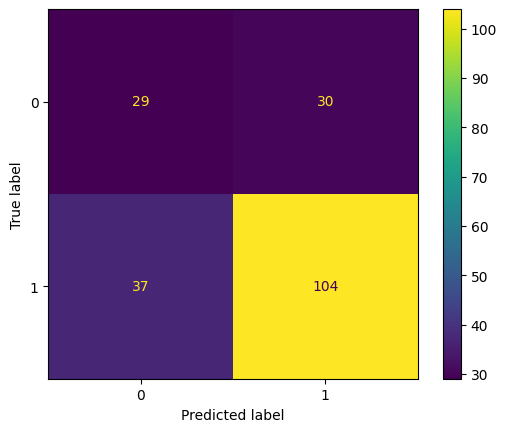

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


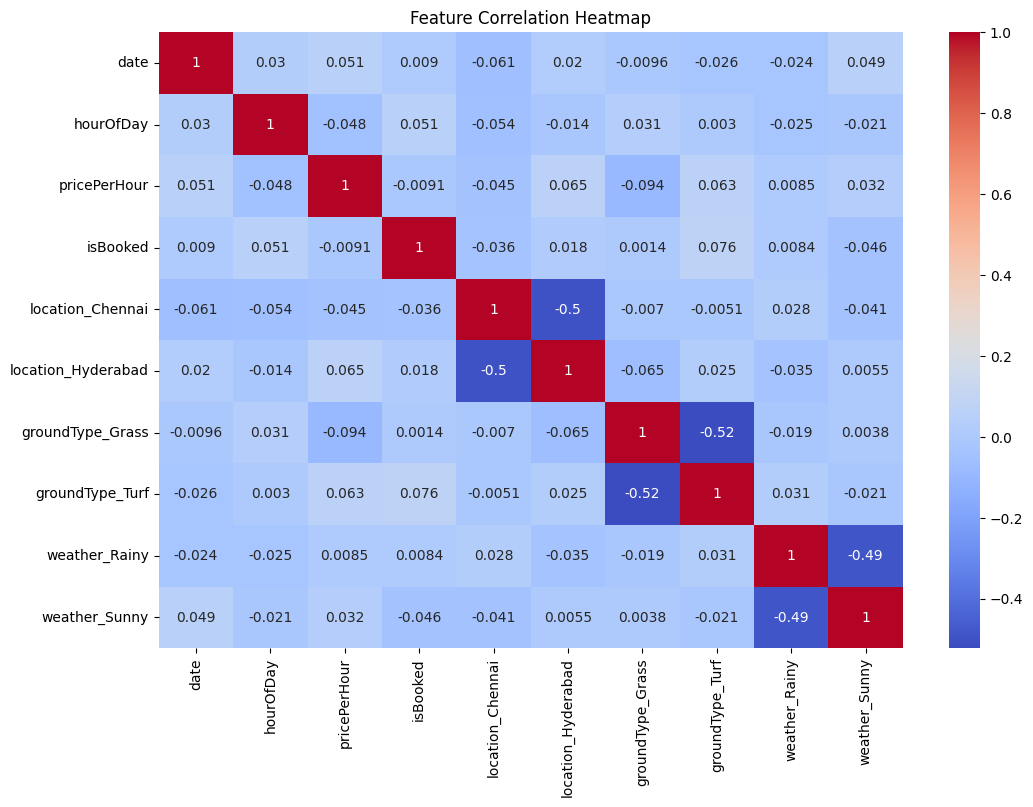

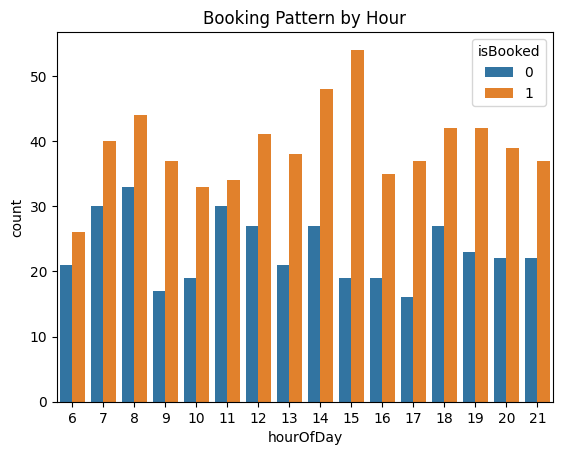

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Booking pattern by hour
sns.countplot(x='hourOfDay', hue='isBooked', data=df)
plt.title('Booking Pattern by Hour')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:28:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:28:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Sample mock data
data = pd.DataFrame({
    'hourOfDay': [8, 10, 18, 20, 15],
    'pricePerHour': [1000, 1200, 800, 900, 1100],
    'location_Bangalore': [0, 1, 0, 1, 0],
    'location_Chennai': [1, 0, 1, 0, 0],
    'groundType_Clay': [0, 1, 0, 1, 0],
    'groundType_Grass': [1, 0, 1, 0, 0],
    'weather_Cloudy': [0, 1, 0, 0, 1],
    'weather_Rainy': [1, 0, 0, 1, 0],
    'isBooked': [1, 0, 1, 0, 1]
})

# Features and label
X = data.drop('isBooked', axis=1)
y = data['isBooked']

# Train model
model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()

In [ ]:
# Save the trained model
with open('booking_model.pkl', 'wb') as f:
    pickle.dump(model, f)
